In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans

from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *

In [27]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

In [3]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data preprocessing

In [4]:
df_raw = pd.read_csv('final_data.csv')
df_raw.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek


In [5]:
def data_generation(df, features, sample_size):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    df_temp = df_temp.sample(frac = sample_size, random_state = 0)
    y = df_temp['popularity']
    X = df_temp.drop('popularity', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    return([X_train, X_test, y_train, y_test])

In [6]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

X_train, X_test, y_train, y_test = data_generation(df_raw, features, .2)

# Data exploration 

### Which features are popular now 

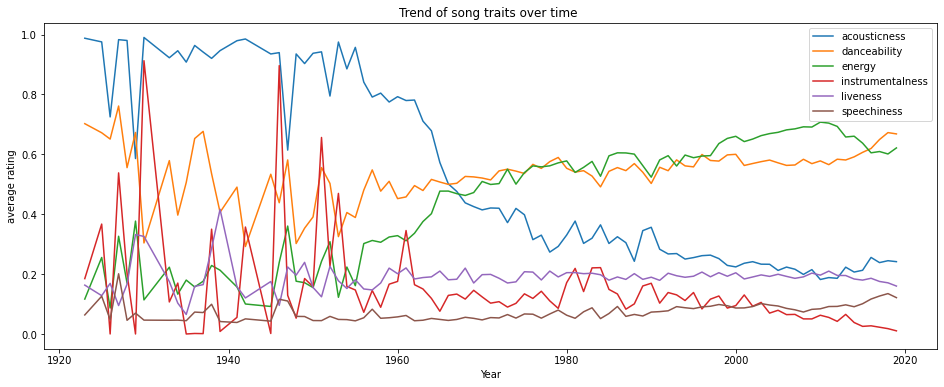

In [9]:
song_traits = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness']

#--------------------------------------------------------------------------------------------------
plt.figure(figsize=(16,6))
for trait in song_traits:
    fig = sns.lineplot(data = df_raw, x='year', y=str(trait),
                       ci=None, label=str(trait), estimator='mean')


fig.title.set_text('Trend of song traits over time ')
fig.set(xlabel='Year', ylabel='average rating')

plt.show()

# Data cleaning

- Should probably drop artist name 
- Should probably drop track name 
- Should probably drop track_id


In [7]:
df = df_raw.copy()

# Changing categorical variable mode
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0

# Changing categorical variable keys
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i

# Changing categorical variable time signature
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i

# Changing popularity into binary variable 
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]
    

df = df.drop('Unnamed: 0', axis=1)
    
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek


# Data exploration 

In [8]:
features = df.columns.to_list()
features = features[4:]

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

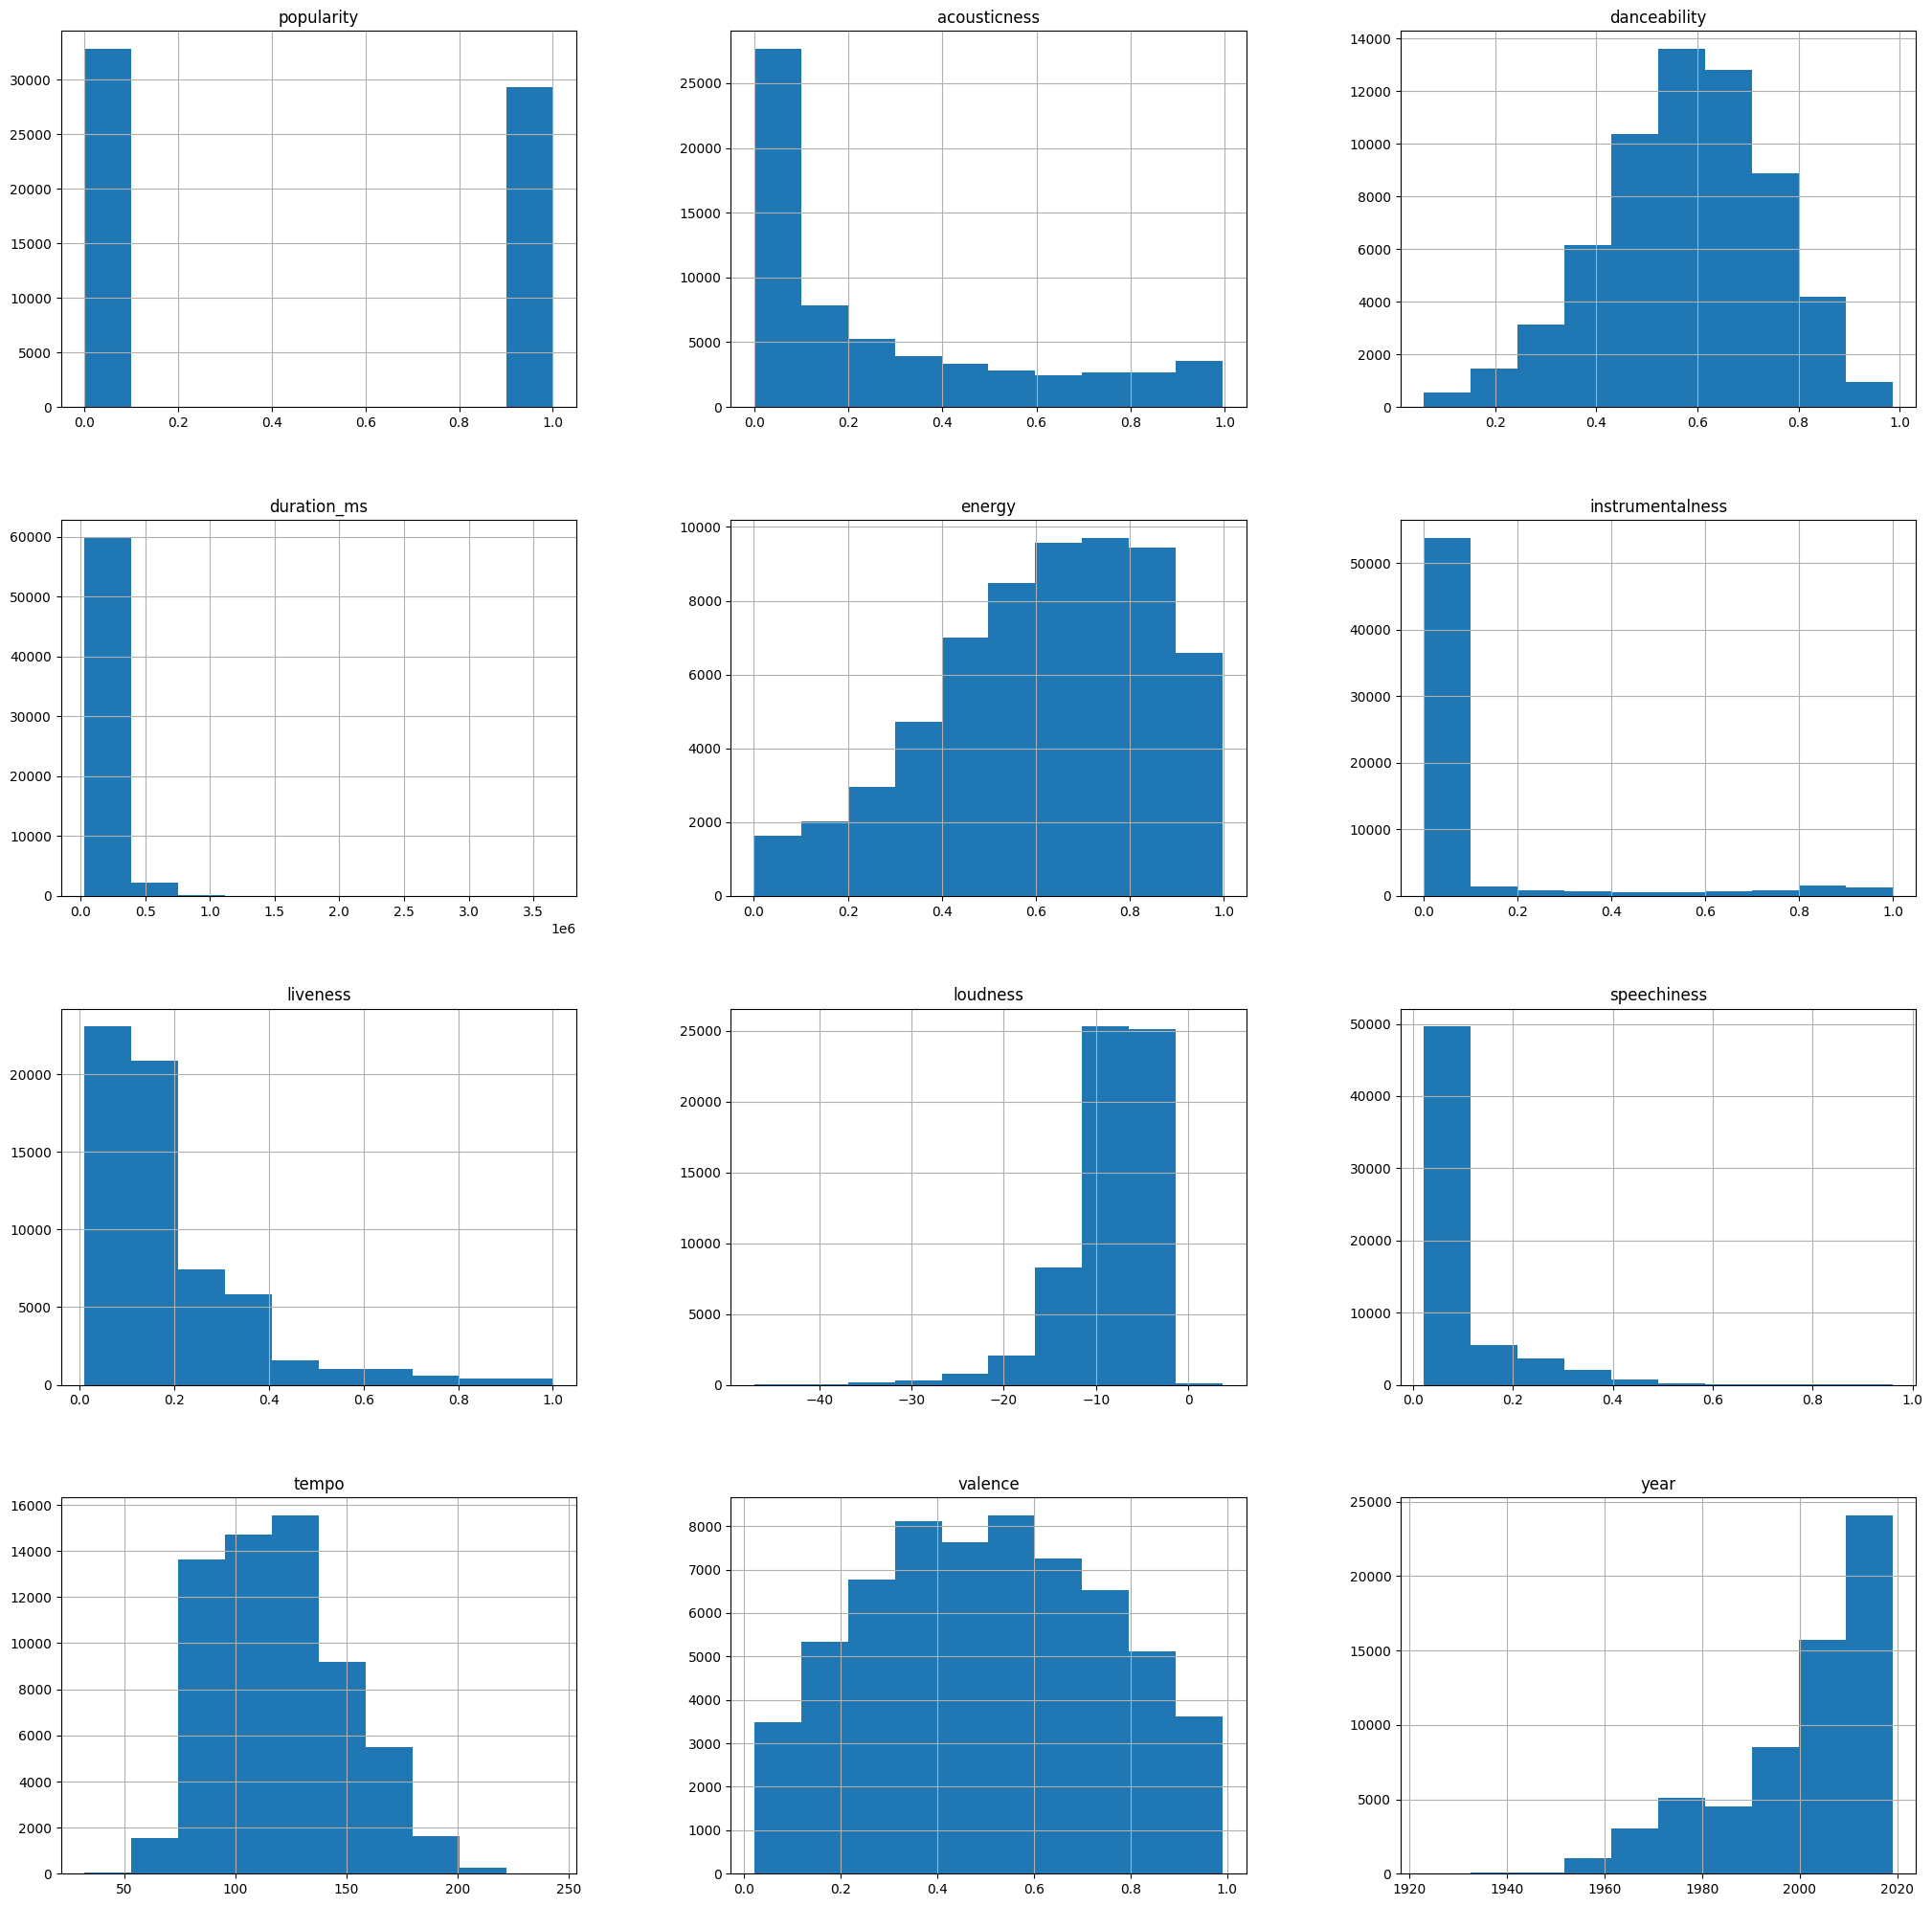

In [9]:
df.hist(figsize=(25,25))

In [10]:
print("\nUNIQUE VALUES:")
print(df.nunique().sort_values())


UNIQUE VALUES:
popularity              2
mode                    2
time_signature          5
key                    12
genre                  26
year                   91
danceability         1013
speechiness          1326
valence              1513
liveness             1642
energy               1696
acousticness         3857
instrumentalness     5028
artist_name          6259
loudness            14375
duration_ms         19127
tempo               27339
track_name          31302
track_id            34530
id                  34530
dtype: int64


In [11]:
df.describe(include="O")

,genre,artist_name,track_name,track_id,key,mode,time_signature,id
count,62125,62125,62125,62125,62125,62125,62125,62125
unique,26,6259,31302,34530,12,2,5,34530
top,Rock,Drake,Home,6AIte2Iej1QKlaofpjCzW1,7,1,0,6AIte2Iej1QKlaofpjCzW1
freq,6532,396,39,8,7320,41444,56848,8


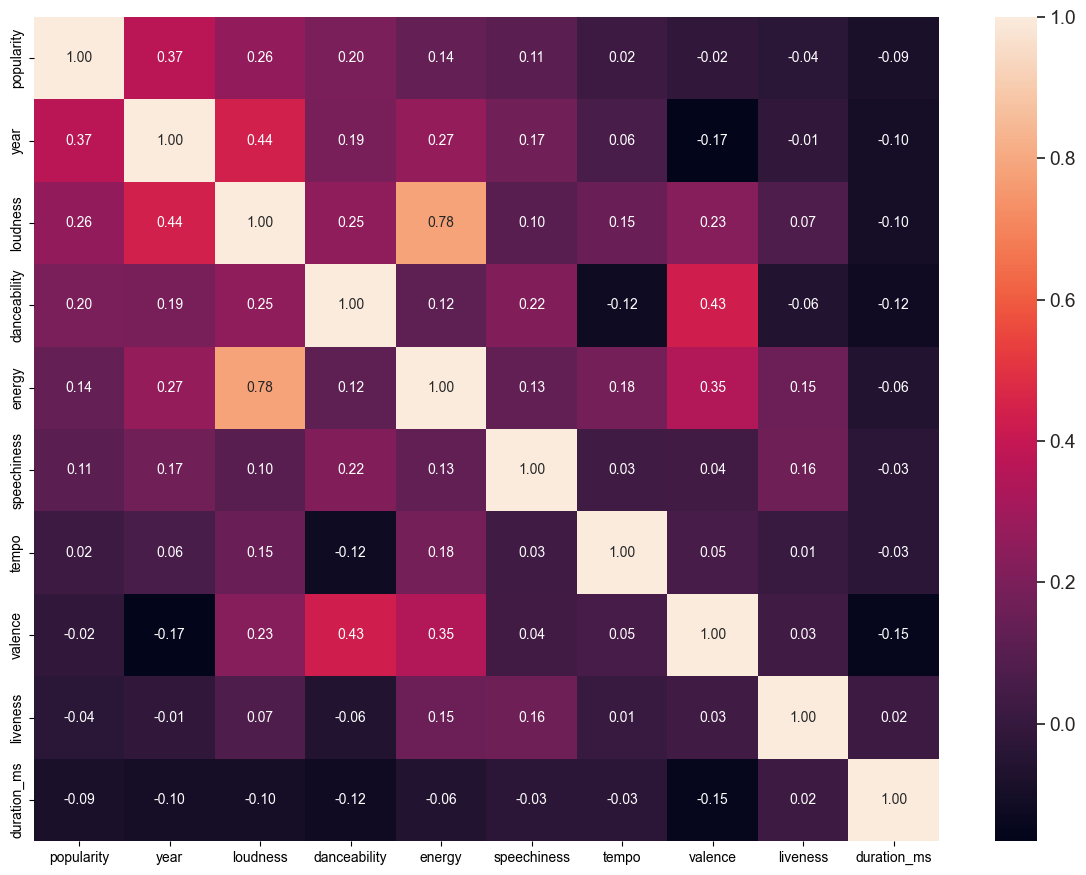

In [14]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

# Comparing model performance 

In [12]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
temp = []
models = []
models.append(('Logistic Regression', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest', DecisionTreeClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('Naive Bayes', GaussianNB()))

models.append(('Gradient boosting', GradientBoostingClassifier()))
models.append(('Ada boost', AdaBoostClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
#'''
# VOTING
randomfor = RandomForestClassifier()
bagging = BaggingClassifier()
svc_class = SVC()
svm_class = SVC(kernel = 'rbf')
gradboost = GradientBoostingClassifier()


list_models = [('randomfor', randomfor),
               ('bagging', bagging), 
               ('svc_class',svc_class),
               ('svm_class', svm_class),
               ('gradboost', gradboost)
              ]
models.append(('Voting classifier', VotingClassifier(estimators=list_models)))
#'''



for name, model in models:
    model = Pipeline(steps=[("scaler", StandardScaler()),
                            ("mdl", model)])
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    temp.append([name, cv_results.mean(), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'score', 'score_std'])
mdl_performance = mdl_performance.sort_values('score', ascending=False)
mdl_performance

,model,score,score_std
1,Random Forest,0.710474,0.010103
11,Bagging classifier,0.681270,0.017286
12,Voting classifier,0.669310,0.012819
3,Support Vector Classifier,0.657237,0.009842
4,Support Vector Machines,0.657237,0.009842
9,Gradient boosting,0.655511,0.013447
5,MLP,0.652062,0.015669
10,Ada boost,0.645623,0.016621
0,Logistic Regression,0.645279,0.013962
7,Decision Tree,0.640790,0.017020


# Random Forest 

In [9]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    "mdl__n_estimators":[5,10,50,100,250],
    "mdl__max_depth":[2,4,8,16,32,None]
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.683994 using {'mdl__max_depth': 16, 'mdl__n_estimators': 250}


The Training Accuracy is:  0.9654498419085944
The Testing Accuracy is:  0.758148893360161
              precision    recall  f1-score   support

 not popular       0.76      0.83      0.79      3960
     popular       0.78      0.70      0.74      3495

    accuracy                           0.77      7455
   macro avg       0.77      0.76      0.76      7455
weighted avg       0.77      0.77      0.77      7455



<Figure size 1152x648 with 0 Axes>

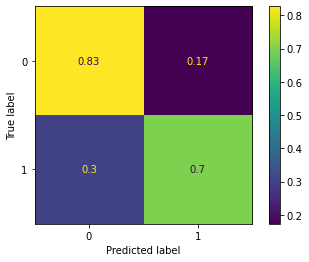

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.550967, G-Mean=0.975


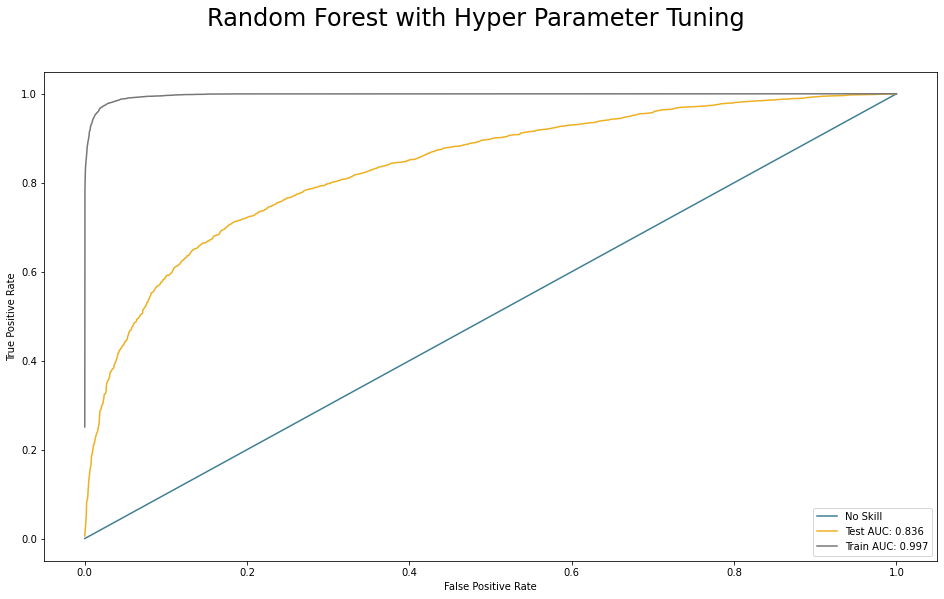

In [12]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier(n_estimators=250,
                                                       max_depth=16))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Random Forest with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Bagging Classifier

In [25]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_features":[.1,1,5,10,20,40],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", BaggingClassifier())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.683311 using {'mdl__max_features': 10, 'mdl__n_estimators': 500}


The Training Accuracy is:  0.992239149180799
The Testing Accuracy is:  0.7702213279678068
              precision    recall  f1-score   support

 not popular       0.82      0.66      0.73      3960
     popular       0.69      0.83      0.75      3495

    accuracy                           0.74      7455
   macro avg       0.75      0.75      0.74      7455
weighted avg       0.75      0.74      0.74      7455



<Figure size 1152x648 with 0 Axes>

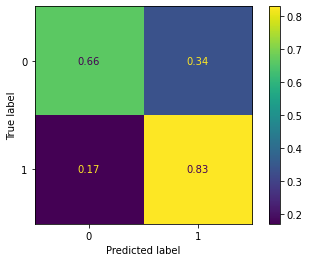

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.424981, G-Mean=0.993


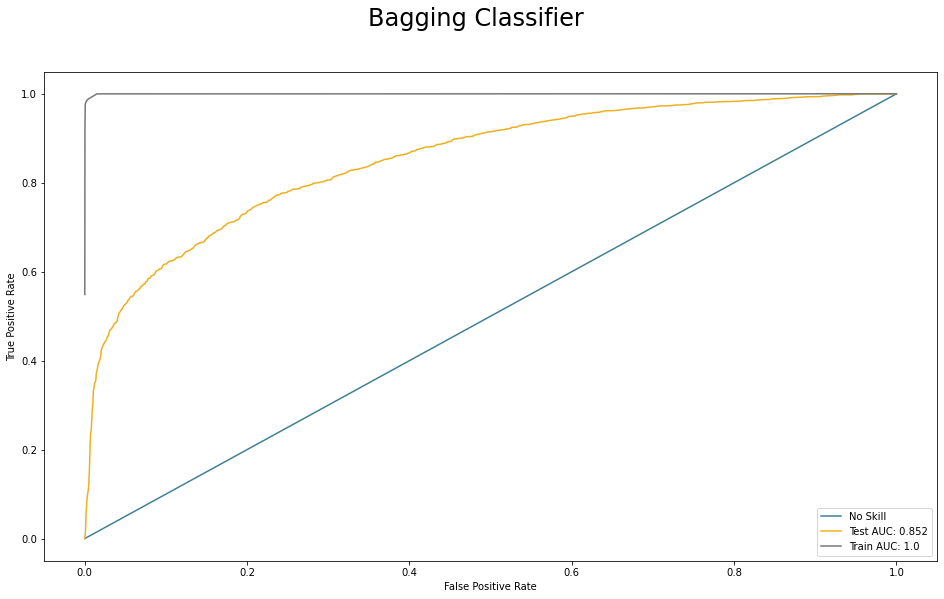

In [49]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", BaggingClassifier(n_estimators=500,
                                                  max_features=10))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Bagging Classifier', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# SVC

In [30]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    "mdl__tol":[.001,.01,.1,1,2],
    'mdl__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", SVC())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.661232 using {'mdl__degree': 0.1, 'mdl__kernel': 'rbf', 'mdl__tol': 0.1}


The Training Accuracy is:  0.6868065536073584
The Testing Accuracy is:  0.6638497652582159
              precision    recall  f1-score   support

 not popular       0.69      0.67      0.68      3960
     popular       0.64      0.66      0.65      3495

    accuracy                           0.66      7455
   macro avg       0.66      0.66      0.66      7455
weighted avg       0.67      0.66      0.66      7455



<Figure size 1152x648 with 0 Axes>

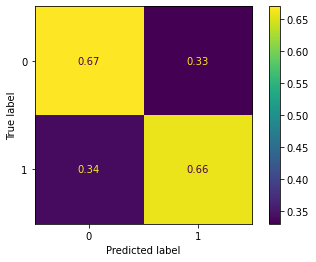

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.494673, G-Mean=0.688


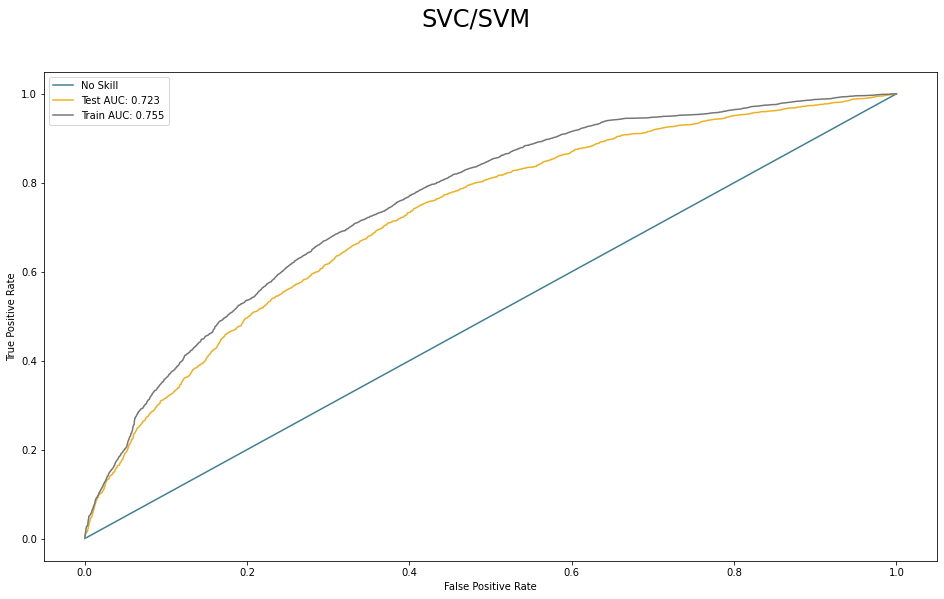

In [50]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", SVC(degree=.1,
                                    kernel='rbf',
                                    tol=.1,
                                   probability=True))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('SVC/SVM', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Gradient Boosting

In [37]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_depth":[1,3,5,7,9],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.669968 using {'mdl__max_depth': 9, 'mdl__n_estimators': 250}


The Training Accuracy is:  0.991434320206956
The Testing Accuracy is:  0.7585513078470825
              precision    recall  f1-score   support

 not popular       0.76      0.79      0.78      3960
     popular       0.76      0.72      0.74      3495

    accuracy                           0.76      7455
   macro avg       0.76      0.76      0.76      7455
weighted avg       0.76      0.76      0.76      7455



<Figure size 1152x648 with 0 Axes>

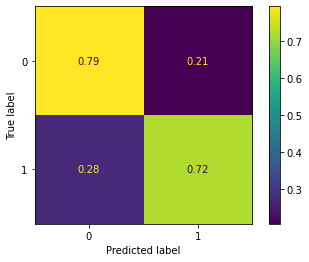

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.527608, G-Mean=0.992


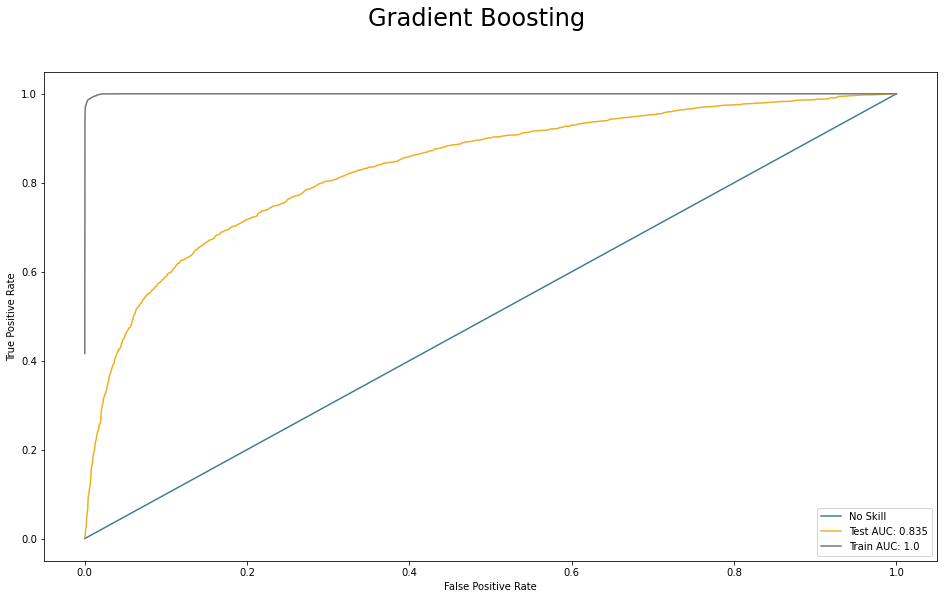

In [51]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier(max_depth=9,
                                                          n_estimators=250))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Gradient Boosting', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Logistic regression

In [ ]:
# Selection of features 






In [46]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    'mdl__penalty' : ['l1','l2'], 
    'mdl__C'       : np.logspace(-8,8,50),
    'mdl__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.647118 using {'mdl__C': 0.0075431200633546075, 'mdl__penalty': 'l2', 'mdl__solver': 'newton-cg'}


The Training Accuracy is:  0.6508192009198045
The Testing Accuracy is:  0.6490945674044266
              precision    recall  f1-score   support

 not popular       0.69      0.63      0.66      3960
     popular       0.62      0.67      0.64      3495

    accuracy                           0.65      7455
   macro avg       0.65      0.65      0.65      7455
weighted avg       0.65      0.65      0.65      7455



<Figure size 1152x648 with 0 Axes>

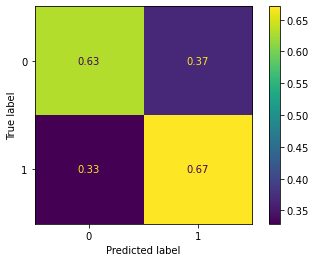

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.491258, G-Mean=0.654


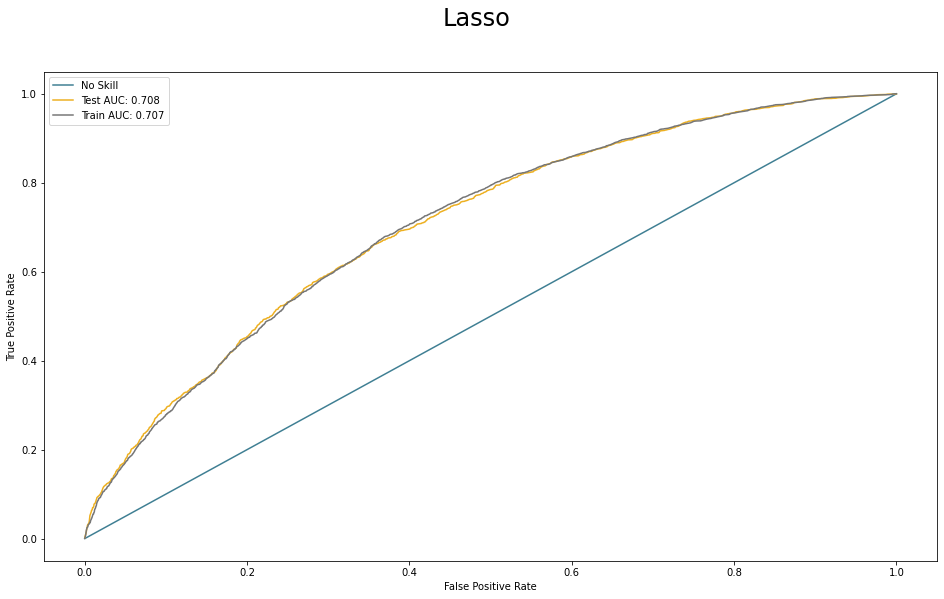

In [52]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(C=0.0075431200633546075,
                                                   penalty='l2',
                                                   solver='newton-cg'))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Lasso', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show() 

# Voting

The Training Accuracy is:  0.9895372233400402
The Testing Accuracy is:  0.7655264922870557
              precision    recall  f1-score   support

 not popular       0.79      0.77      0.78      3960
     popular       0.74      0.76      0.75      3495

    accuracy                           0.77      7455
   macro avg       0.76      0.77      0.76      7455
weighted avg       0.77      0.77      0.77      7455



<Figure size 1152x648 with 0 Axes>

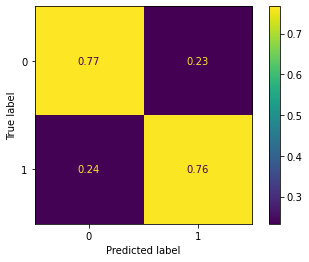

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.496949, G-Mean=0.990


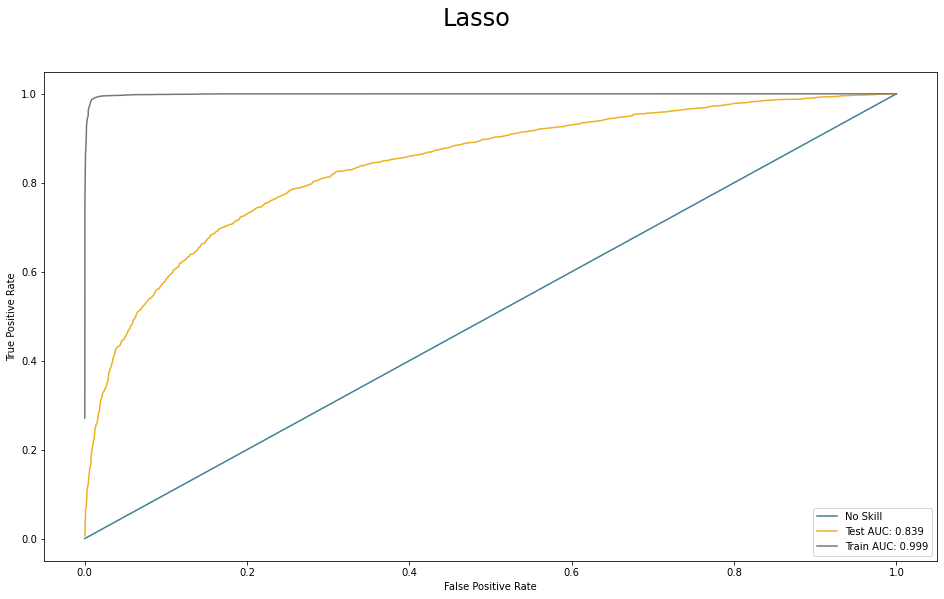

In [13]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
gradboost = GradientBoostingClassifier(max_depth=9, n_estimators=250)
randomfor = RandomForestClassifier(n_estimators=100, max_depth=32)
svc = SVC(degree=.1, kernel='rbf', tol=.1, probability=True)
bagging = BaggingClassifier(n_estimators=500, max_features=10)
logistic = LogisticRegression(C=0.0075431200633546075, penalty='l2', solver='newton-cg')

list_models = [('gradboost', gradboost),
               ('randomfor', randomfor),
               ('svc', svc),
               ('bagging', bagging),
               ('logistic', logistic)]

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", VotingClassifier(estimators=list_models, voting='soft'))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Lasso', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show() 

# Part 2: Clustering 

In [42]:
df_cluster = df.copy()

#--------------------------------------------------------------------------------------------------
features = ['artist_name', 'track_name', 'track_id', 'popularity', 'danceability', 'energy',
            'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

df_cluster = df_cluster.loc[:,features]

df_cluster.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0
1,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0
2,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0
3,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0
4,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0


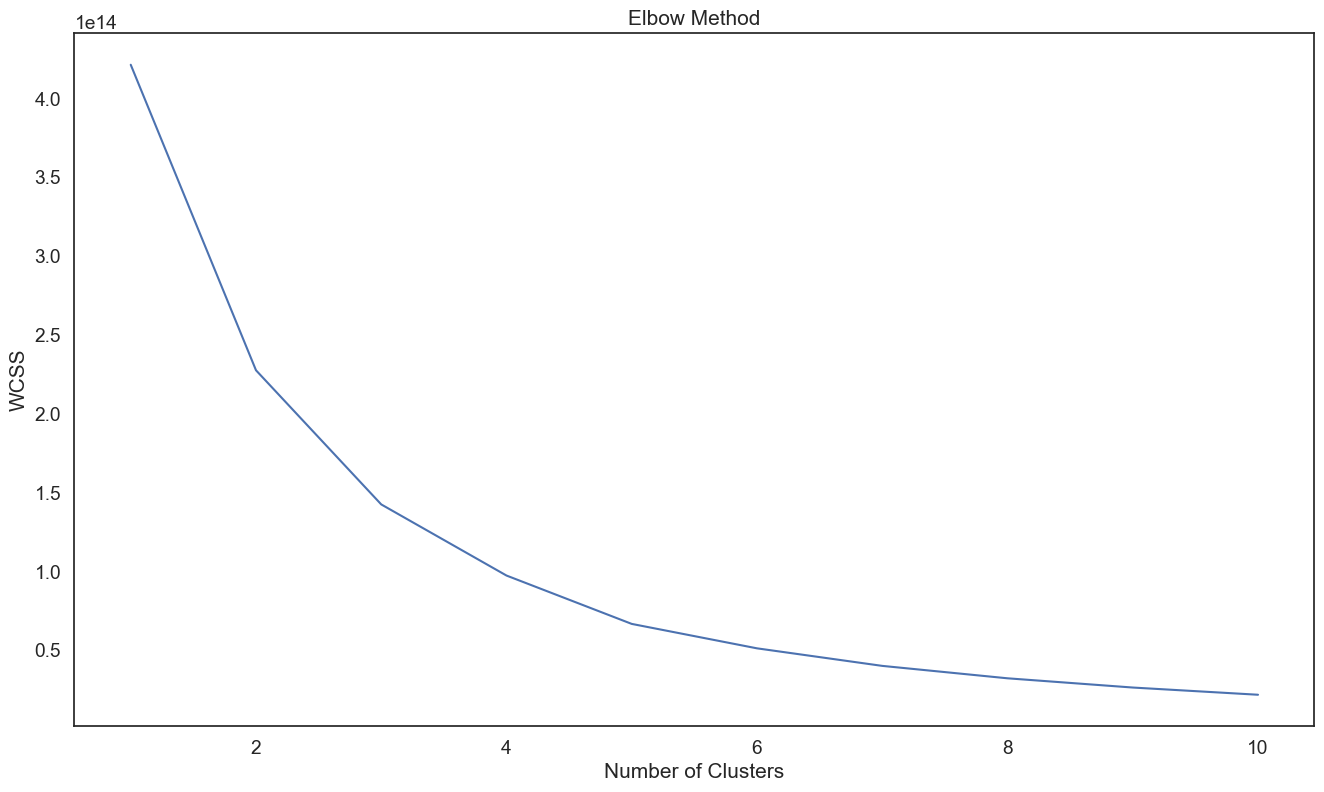

In [43]:
# Removeing categorical variables 
X_train = df_cluster.iloc[:,3:16]

#--------------------------------------------------------------------------------------------------
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot(x=range(1,11), y=wcss)

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()  

In [62]:
#--------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

#--------------------------------------------------------------------------------------------------
# instantiating model
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(X_train)

#--------------------------------------------------------------------------------------------------
# converting preditcions into a df
y_pred_df = pd.DataFrame(data=y_pred, dtype=int)
y_pred_df.columns = ['k_cluster']

print(y_pred_df.shape)
y_pred_df.head()

#--------------------------------------------------------------------------------------------------
# Creating new df with cluster numbers column 
df_cluster_final = df_cluster.copy()
df_cluster_final['type'] = kmeans.labels_

(62125, 1)


In [63]:
# Id of the songs you want to find similar of
ids = ['2YegxR5As7BeQuVp2U6pek']

# search the specified ids in this dataset and get the tracks
favorites = df_cluster_final[df_cluster_final.track_id.isin(ids)]

# code to sort find out the maximum occuring cluster number according to user's favorite track types
cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
    clusters[num] = cluster_numbers.count(num)
    

# sort the cluster numbers and find out the number which occurs the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# finally get the tracks of that cluster
suggestions = df_cluster_final[df_cluster_final.type == user_favorite_cluster]

# now print the first 5 rows of the data frame having that cluster number as their type
suggestions.head()




Favorite cluster: 1 



,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,type
0,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0,1
1,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0,1
2,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0,1
3,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0,1
4,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.724,0.689,0,-5.922,0,0.135,0.083,0.0,0.304,0.693,146.496,246333,0,1
